In [1]:
import pm4py

In [2]:
src_log = pm4py.read_xes("3_modified.xes")

d:\Programs\Programming\Python\lib\site-packages\pm4py\util\dt_parsing\parser.py:82: UserWarning: ISO8601 strings are not fully supported with strpfromiso for Python versions below 3.11
  warnings.warn(


parsing log, completed traces ::   0%|          | 0/12 [00:00<?, ?it/s]

In [3]:
log = src_log.copy()
log

concept:name  \
0        Procfiler/MethodStart_{Microsoft.CodeAnalysis....   
1               GC/SampledObjectAllocation_{System.String}   
2        Procfiler/MethodStart_{Interop+Advapi32.EventA...   
3        Procfiler/MethodEnd_{Interop+Advapi32.EventAct...   
4                GC/SampledObjectAllocation_{ActivityInfo}   
...                                                    ...   
2341769  Method/LoadVerbose_{Microsoft.CodeAnalysis.Com...   
2341770  Procfiler/MethodStart_{Microsoft.CodeAnalysis....   
2341771  Procfiler/MethodEnd_{Microsoft.CodeAnalysis.Co...   
2341772  Procfiler/MethodEnd_{Microsoft.CodeAnalysis.CS...   
2341773  Procfiler/MethodEnd_{Microsoft.CodeAnalysis.CS...   

                          time:timestamp  ManagedThreadId  NativeThreadId  \
0       2025-01-10 20:01:47.093946+00:00            25452           25452   
1       2025-01-10 20:01:47.094202+00:00            25452           25452   
2       2025-01-10 20:01:47.094207+00:00            25452           25452   
3       2025-01-10 20:01:47.094208+00:00            25452           25452   
4       2025-01-10 20:01:47.094209+00:00            25452           25452   
...                                  ...              ...             ...   
2341769 2025-01-10 20:03:37.599570+00:00               -1           18968   
2341770 2025-01-10 20:03:37.599576+00:00            18968           18968   
2341771 2025-01-10 20:03:37.599580+00:00            18968           18968   
2341772 2025-01-10 20:03:37.599580+00:00            18968           18968   
2341773 2025-01-10 20:03:37.599581+00:00            18968           18968   

               QpcStamp case:concept:name  \
0        13371926562902                 1   
1        13371926565460                 1   
2        13371926565514                 1   
3        13371926565518                 1   
4        13371926565530                 1   
...                 ...               ...   
2341769  13373031606221                12   
2341770  13373031606272                12   
2341771  13373031606318                12   
2341772  13373031606321                12   
2341773  13373031606324                12   

                                          concept:instance  \
0                                                      NaN   
1                                                      NaN   
2                                                      NaN   
3                                                      NaN   
4                                                      NaN   
...                                                    ...   
2341769  MethodLoadUnload_Microsoft.CodeAnalysis.Comman...   
2341770                                                NaN   
2341771                                                NaN   
2341772                                                NaN   
2341773                                                NaN   

        lifecycle:transition  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  
...                      ...  
2341769                start  
2341770                  NaN  
2341771                  NaN  
2341772                  NaN  
2341773                  NaN  

[2341774 rows x 8 columns]

In [4]:
procfiler = (log["concept:name"].str.startswith("Procfiler/") & log["concept:name"].str.contains("{Microsoft.CodeAnalysis"))
log = log[procfiler][["case:concept:name", "concept:name", "time:timestamp"]].reset_index(drop = True)
log

case:concept:name                                       concept:name  \
0                       1  Procfiler/MethodStart_{Microsoft.CodeAnalysis....   
1                       1  Procfiler/MethodStart_{Microsoft.CodeAnalysis....   
2                       1  Procfiler/MethodStart_{Microsoft.CodeAnalysis....   
3                       1  Procfiler/MethodEnd_{Microsoft.CodeAnalysis.Co...   
4                       1  Procfiler/MethodStart_{Microsoft.CodeAnalysis....   
...                   ...                                                ...   
1919603                12  Procfiler/MethodEnd_{Microsoft.CodeAnalysis.Co...   
1919604                12  Procfiler/MethodStart_{Microsoft.CodeAnalysis....   
1919605                12  Procfiler/MethodEnd_{Microsoft.CodeAnalysis.Co...   
1919606                12  Procfiler/MethodEnd_{Microsoft.CodeAnalysis.CS...   
1919607                12  Procfiler/MethodEnd_{Microsoft.CodeAnalysis.CS...   

                          time:timestamp  
0       2025-01-10 20:01:47.093946+00:00  
1       2025-01-10 20:01:47.211562+00:00  
2       2025-01-10 20:01:47.213322+00:00  
3       2025-01-10 20:01:47.213431+00:00  
4       2025-01-10 20:01:47.213751+00:00  
...                                  ...  
1919603 2025-01-10 20:03:37.599533+00:00  
1919604 2025-01-10 20:03:37.599576+00:00  
1919605 2025-01-10 20:03:37.599580+00:00  
1919606 2025-01-10 20:03:37.599580+00:00  
1919607 2025-01-10 20:03:37.599581+00:00  

[1919608 rows x 3 columns]

In [5]:
import re
import tqdm

names = [ ]
for item in tqdm.tqdm(log["concept:name"].to_numpy()):
    item = re.sub(r'\[(.*)\]', '', item)
    item = re.sub(r'\`(\d*)', '', item)
    item = re.sub(r'[\+\.]\<[^\}]*', '', item)
    item = re.sub(r'\<(.*)\>', '', item)
    res = re.search(r'Procfiler\/Method(Start|End)\_\{Microsoft\.CodeAnalysis\.([a-zA-Z0-9\.\+\_]*)\}', item)

    if res is None:
        print(item)
        names.append(item)
    else:
        names.append(f"{res.group(1)}:{res.group(2)}")

log["concept:name"] = names
log

100%|██████████| 1919608/1919608 [00:06<00:00, 309945.37it/s]


case:concept:name                                       concept:name  \
0                       1              Start:CSharp.CommandLine.Program.Main   
1                       1          Start:CSharp.CommandLine.Program.MainCore   
2                       1       Start:CommandLine.CompilerServerLogger..ctor   
3                       1         End:CommandLine.CompilerServerLogger..ctor   
4                       1  Start:CommandLine.BuildClient.GetCompileOnServ...   
...                   ...                                                ...   
1919603                12                    End:CommandLine.BuildClient.Run   
1919604                12     Start:CommandLine.CompilerServerLogger.Dispose   
1919605                12       End:CommandLine.CompilerServerLogger.Dispose   
1919606                12            End:CSharp.CommandLine.Program.MainCore   
1919607                12                End:CSharp.CommandLine.Program.Main   

                          time:timestamp  
0       2025-01-10 20:01:47.093946+00:00  
1       2025-01-10 20:01:47.211562+00:00  
2       2025-01-10 20:01:47.213322+00:00  
3       2025-01-10 20:01:47.213431+00:00  
4       2025-01-10 20:01:47.213751+00:00  
...                                  ...  
1919603 2025-01-10 20:03:37.599533+00:00  
1919604 2025-01-10 20:03:37.599576+00:00  
1919605 2025-01-10 20:03:37.599580+00:00  
1919606 2025-01-10 20:03:37.599580+00:00  
1919607 2025-01-10 20:03:37.599581+00:00  

[1919608 rows x 3 columns]

In [6]:
pm4py.write_xes(log, "after_regex.xes")

exporting log, completed traces ::   0%|          | 0/12 [00:00<?, ?it/s]

In [7]:
log["concept:name"].value_counts()

concept:name
Start:GreenNode+NodeFlagsAndSlotCount.get_NodeFlags                      58589
End:GreenNode+NodeFlagsAndSlotCount.get_NodeFlags                        58589
Start:GreenNode.get_RawKind                                              49664
End:GreenNode.get_RawKind                                                49664
End:CSharp.Syntax.InternalSyntax.CSharpSyntaxNode.get_Kind               42019
                                                                         ...  
Start:CSharp.Syntax.InternalSyntax.SwitchExpressionSyntax..ctor              1
End:CSharp.Syntax.InternalSyntax.SwitchExpressionSyntax..ctor                1
End:CSharp.Syntax.InternalSyntax.ContextAwareSyntax.SwitchExpression         1
End:CSharp.Syntax.InternalSyntax.LanguageParser.ParseSwitchExpression        1
End:CSharp.Syntax.ClassDeclarationSyntax.get_Keyword                         1
Name: count, Length: 5886, dtype: int64

In [9]:
import tqdm
import numpy
import pandas

def filter(event_log):
    event_log = event_log.copy()
    event_log_list = []
    for row in tqdm.tqdm(event_log.iterrows(), total = len(event_log)):
        event_log_list.append(row[1].to_dict())


    edges_in = {}
    edges_out = {}
    for i in tqdm.trange(len(event_log_list) - 1):
        if event_log_list[i]["case:concept:name"] != event_log_list[i + 1]["case:concept:name"]:
            continue

        cur_text = event_log_list[i]["concept:name"]
        next_text = event_log_list[i + 1]["concept:name"]

        if cur_text not in edges_out:
            edges_out[cur_text] = set()
        edges_out[cur_text].add(next_text)

        if next_text not in edges_in:
            edges_in[next_text] = set()
        edges_in[next_text].add(cur_text)
        
        if cur_text not in edges_in:
            edges_in[cur_text] = set()
        if next_text not in edges_out:
            edges_out[next_text] = set()


    edges_in_count = {}
    for key, value in edges_in.items():
        edges_in_count[key] = len(value)
    print(numpy.unique(list(edges_in_count.values()), return_counts = True))
    
    edges_out_count = {}
    for key, value in edges_out.items():
        edges_out_count[key] = len(value)
    print(numpy.unique(list(edges_out_count.values()), return_counts = True))
        
    i = 0
    pbar = tqdm.trange(0, len(event_log_list))
    pbar_iter = iter(pbar)
    while i < len(event_log_list) - 1:
        cur_event = event_log_list[i]
        next_event = event_log_list[i + 1]
        if cur_event["case:concept:name"] != next_event["case:concept:name"]:
            i += 1
            next(pbar_iter)
            continue

        exactly_one_out = (len(edges_out[cur_event['concept:name']]) == 1)
        exactly_one_in = (len(edges_in[next_event['concept:name']]) == 1)
        
        if not exactly_one_out or not exactly_one_in:
            i += 1
            next(pbar_iter)
            continue

        new_name = cur_event['concept:name'] + "\n" + next_event['concept:name']

        if new_name not in edges_in:
            edges_in[new_name] = set()
        edges_in[new_name] = edges_in[new_name].union(edges_in[cur_event['concept:name']])
        
        if new_name not in edges_out:
            edges_out[new_name] = set()
        edges_out[new_name] = edges_out[new_name].union(edges_out[next_event['concept:name']])

        event_log_list[i]['concept:name'] = new_name
        del event_log_list[i + 1]
        pbar.total = len(event_log_list)

    return pandas.DataFrame(event_log_list)

log_filt = filter(log)
log_filt

100%|██████████| 1919607/1919607 [00:00<00:00, 2565824.23it/s]


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        27,  28,  29,  30,  31,  32,  34,  39,  55,  58,  59,  73, 130,
       147]), array([   1, 4260,  843,  340,  146,   74,   50,   38,   17,   15,   20,
          8,    8,    8,    6,    3,    5,    3,    5,    2,    2,    2,
          3,    4,    1,    2,    4,    2,    2,    1,    1,    1,    2,
          1,    1,    1,    1,    1,    1,    1], dtype=int64))
(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  24,  25,  26,
        27,  28,  32,  33,  38,  40,  51,  53,  59,  66,  67,  70, 123,
       165]), array([   1, 4333,  777,  323,  145,   83,   42,   40,   27,   12,   19,
         15,    5,   10,    6,    2,    5,    4,    2,    4,    3,    2,
          3,    3,    1,    2,    1,    3,    1,    1,    1,    2,    1,
          1,    1,    1,    1,    1,

100%|█████████▉| 1375086/1375088 [05:31<00:00, 4149.89it/s] 


case:concept:name                                       concept:name  \
0                       1  Start:CSharp.CommandLine.Program.Main\nStart:C...   
1                       1                      Start:CommandLine.BuildClient   
2                       1                        End:CommandLine.BuildClient   
3                       1  End:CommandLine.BuildClient.GetCompileOnServer...   
4                       1  Start:RuntimeHostInfo.get_IsCoreClrRuntime\nEn...   
...                   ...                                                ...   
1375083                12                       End:PooledObjects.ObjectPool   
1375084                12                             End:DiagnosticBag.Free   
1375085                12  End:CommonCompiler.RunCore\nEnd:CommonCompiler...   
1375086                12                         End:CSharp.CommandLine.Csc   
1375087                12  End:CommandLine.ConsoleUtil.RunWithUtf8Output\...   

                          time:timestamp  
0       2025-01-10 20:01:47.093946+00:00  
1       2025-01-10 20:01:47.213788+00:00  
2       2025-01-10 20:01:47.213795+00:00  
3       2025-01-10 20:01:47.213799+00:00  
4       2025-01-10 20:01:47.215063+00:00  
...                                  ...  
1375083 2025-01-10 20:03:37.599445+00:00  
1375084 2025-01-10 20:03:37.599445+00:00  
1375085 2025-01-10 20:03:37.599445+00:00  
1375086 2025-01-10 20:03:37.599454+00:00  
1375087 2025-01-10 20:03:37.599454+00:00  

[1375088 rows x 3 columns]

In [12]:
log_filt['case:concept:name'].value_counts()

case:concept:name
4     282699
2     134695
3     119829
10    114699
9     106866
7      95623
8      95623
5      91015
1      89160
11     85511
6      82971
12     76397
Name: count, dtype: int64

In [11]:
pm4py.write_xes(log_filt, "after_super_puper_mega_filter.xes")

exporting log, completed traces ::   0%|          | 0/12 [00:00<?, ?it/s]

80


(array([30.,  8.,  8., 12.,  8.,  2.,  4.,  2.,  0.,  6.]),
 array([2064. , 2771.3, 3478.6, 4185.9, 4893.2, 5600.5, 6307.8, 7015.1,
        7722.4, 8429.7, 9137. ]),
 <BarContainer object of 10 artists>)

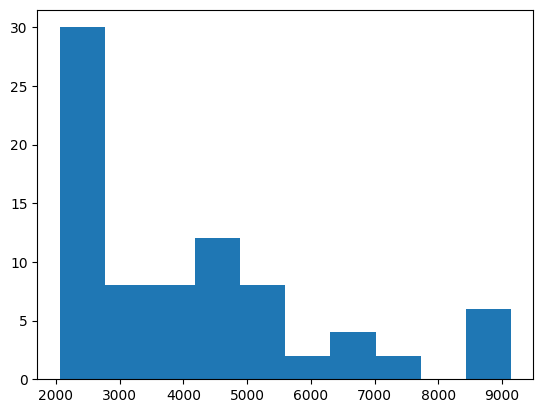

In [7]:
import matplotlib.pyplot as plt
vc = log['concept:name'].value_counts().to_numpy()
vc = vc[(vc > 2000) & (vc < 10000)]
print(len(vc))
plt.hist(vc)

In [8]:
def remove_events_two_sided(event_log):
    value_counts_normalized = event_log['concept:name'].value_counts()
    values_above_threshold = value_counts_normalized[(value_counts_normalized >= 2500) & (value_counts_normalized <= 10000)].index
    return event_log[event_log['concept:name'].isin(values_above_threshold)]

log = remove_events_two_sided(log)
log

case:concept:name                    concept:name  \
112                     1  Start:PooledObjects.ObjectPool   
113                     1    End:PooledObjects.ObjectPool   
117                     1  Start:PooledObjects.ObjectPool   
118                     1  Start:PooledObjects.ObjectPool   
119                     1  Start:PooledObjects.ObjectPool   
...                   ...                             ...   
1919561                12     End:Text.TextSpan.get_Start   
1919587                12  Start:PooledObjects.ObjectPool   
1919588                12  Start:PooledObjects.ObjectPool   
1919589                12    End:PooledObjects.ObjectPool   
1919590                12    End:PooledObjects.ObjectPool   

                          time:timestamp  
112     2025-01-10 20:01:47.312071+00:00  
113     2025-01-10 20:01:47.312109+00:00  
117     2025-01-10 20:01:47.312197+00:00  
118     2025-01-10 20:01:47.312296+00:00  
119     2025-01-10 20:01:47.312362+00:00  
...                                  ...  
1919561 2025-01-10 20:03:37.599267+00:00  
1919587 2025-01-10 20:03:37.599443+00:00  
1919588 2025-01-10 20:03:37.599444+00:00  
1919589 2025-01-10 20:03:37.599444+00:00  
1919590 2025-01-10 20:03:37.599445+00:00  

[277114 rows x 3 columns]

In [ ]:
def remove_rare_events(event_log):
    value_counts_normalized = event_log['concept:name'].value_counts(normalize = True)
    values_above_threshold = value_counts_normalized[value_counts_normalized >= 0.005 & value_counts_normalized <= 0.005].index
    return event_log[event_log['concept:name'].isin(values_above_threshold)]

log = remove_rare_events(log)
log

case:concept:name                                       concept:name  \
427                    1  Start:CSharp.Syntax.InternalSyntax.AbstractLex...   
428                    1  Start:CSharp.Syntax.InternalSyntax.SlidingText...   
429                    1  End:CSharp.Syntax.InternalSyntax.SlidingTextWi...   
430                    1  End:CSharp.Syntax.InternalSyntax.AbstractLexer...   
431                    1  Start:CSharp.Syntax.InternalSyntax.SlidingText...   
...                  ...                                                ...   
819131                12  End:CSharp.Syntax.InternalSyntax.SyntaxToken.g...   
819142                12  Start:CSharp.Syntax.InternalSyntax.SyntaxToken...   
819143                12  Start:CSharp.Syntax.InternalSyntax.CSharpSynta...   
819144                12  End:CSharp.Syntax.InternalSyntax.CSharpSyntaxN...   
819145                12  End:CSharp.Syntax.InternalSyntax.SyntaxToken.g...   

                         time:timestamp  
427    2025-01-10 20:01:47.534330+00:00  
428    2025-01-10 20:01:47.534379+00:00  
429    2025-01-10 20:01:47.534384+00:00  
430    2025-01-10 20:01:47.534385+00:00  
431    2025-01-10 20:01:47.534424+00:00  
...                                 ...  
819131 2025-01-10 20:03:37.358857+00:00  
819142 2025-01-10 20:03:37.358877+00:00  
819143 2025-01-10 20:03:37.358877+00:00  
819144 2025-01-10 20:03:37.358878+00:00  
819145 2025-01-10 20:03:37.358878+00:00  

[376324 rows x 3 columns]

In [9]:
import pandas

def remove_duplicates(event_log):
    event_log_list = []
    for row in tqdm.tqdm(event_log.iterrows(), total = len(event_log)):
        event_log_list.append(row[1].to_dict())

    i = 0
    pbar = tqdm.trange(0, len(event_log_list))
    pbar_iter = iter(pbar)
    while i < len(event_log_list) - 1:
        cur_event = event_log_list[i]
        next_event = event_log_list[i + 1]
        if cur_event["case:concept:name"] != next_event["case:concept:name"]:
            i += 1
            next(pbar_iter)
            continue
        
        if cur_event["concept:name"] == next_event["concept:name"]:
            del event_log_list[i + 1]
            pbar.total = len(event_log_list)
            continue

        i += 1
        next(pbar_iter)

    return pandas.DataFrame(event_log_list)

log = remove_duplicates(log)
log["concept:name"].value_counts()

100%|█████████▉| 268152/268154 [00:01<00:00, 155141.60it/s]


concept:name
Start:Collections.Internal.SegmentedArrayHelper.GetSegmentShift                               9137
End:Collections.Internal.SegmentedArrayHelper.GetSegmentShift                                 9137
Start:Collections.Internal.SegmentedArrayHelper.GetOffsetMask                                 8906
End:Collections.Internal.SegmentedArrayHelper.GetOffsetMask                                   8906
Start:ArrayElement                                                                            8779
End:ArrayElement                                                                              8779
Start:SyntaxNode.get_Green                                                                    6729
End:SyntaxNode.get_Green                                                                      6729
End:Syntax.InternalSyntax.SyntaxListBuilder.get_Count                                         6392
Start:Syntax.InternalSyntax.SyntaxListBuilder.get_Count                                       63

In [174]:
pm4py.write_xes(log, "filter_1prc.xes")

exporting log, completed traces ::   0%|          | 0/12 [00:00<?, ?it/s]

In [10]:
log["concept:name"].value_counts()

concept:name
Start:Collections.Internal.SegmentedArrayHelper.GetSegmentShift                               9137
End:Collections.Internal.SegmentedArrayHelper.GetSegmentShift                                 9137
Start:Collections.Internal.SegmentedArrayHelper.GetOffsetMask                                 8906
End:Collections.Internal.SegmentedArrayHelper.GetOffsetMask                                   8906
Start:ArrayElement                                                                            8779
End:ArrayElement                                                                              8779
Start:SyntaxNode.get_Green                                                                    6729
End:SyntaxNode.get_Green                                                                      6729
End:Syntax.InternalSyntax.SyntaxListBuilder.get_Count                                         6392
Start:Syntax.InternalSyntax.SyntaxListBuilder.get_Count                                       63

In [5]:
heuristics_net = pm4py.discover_heuristics_net(
    log
)

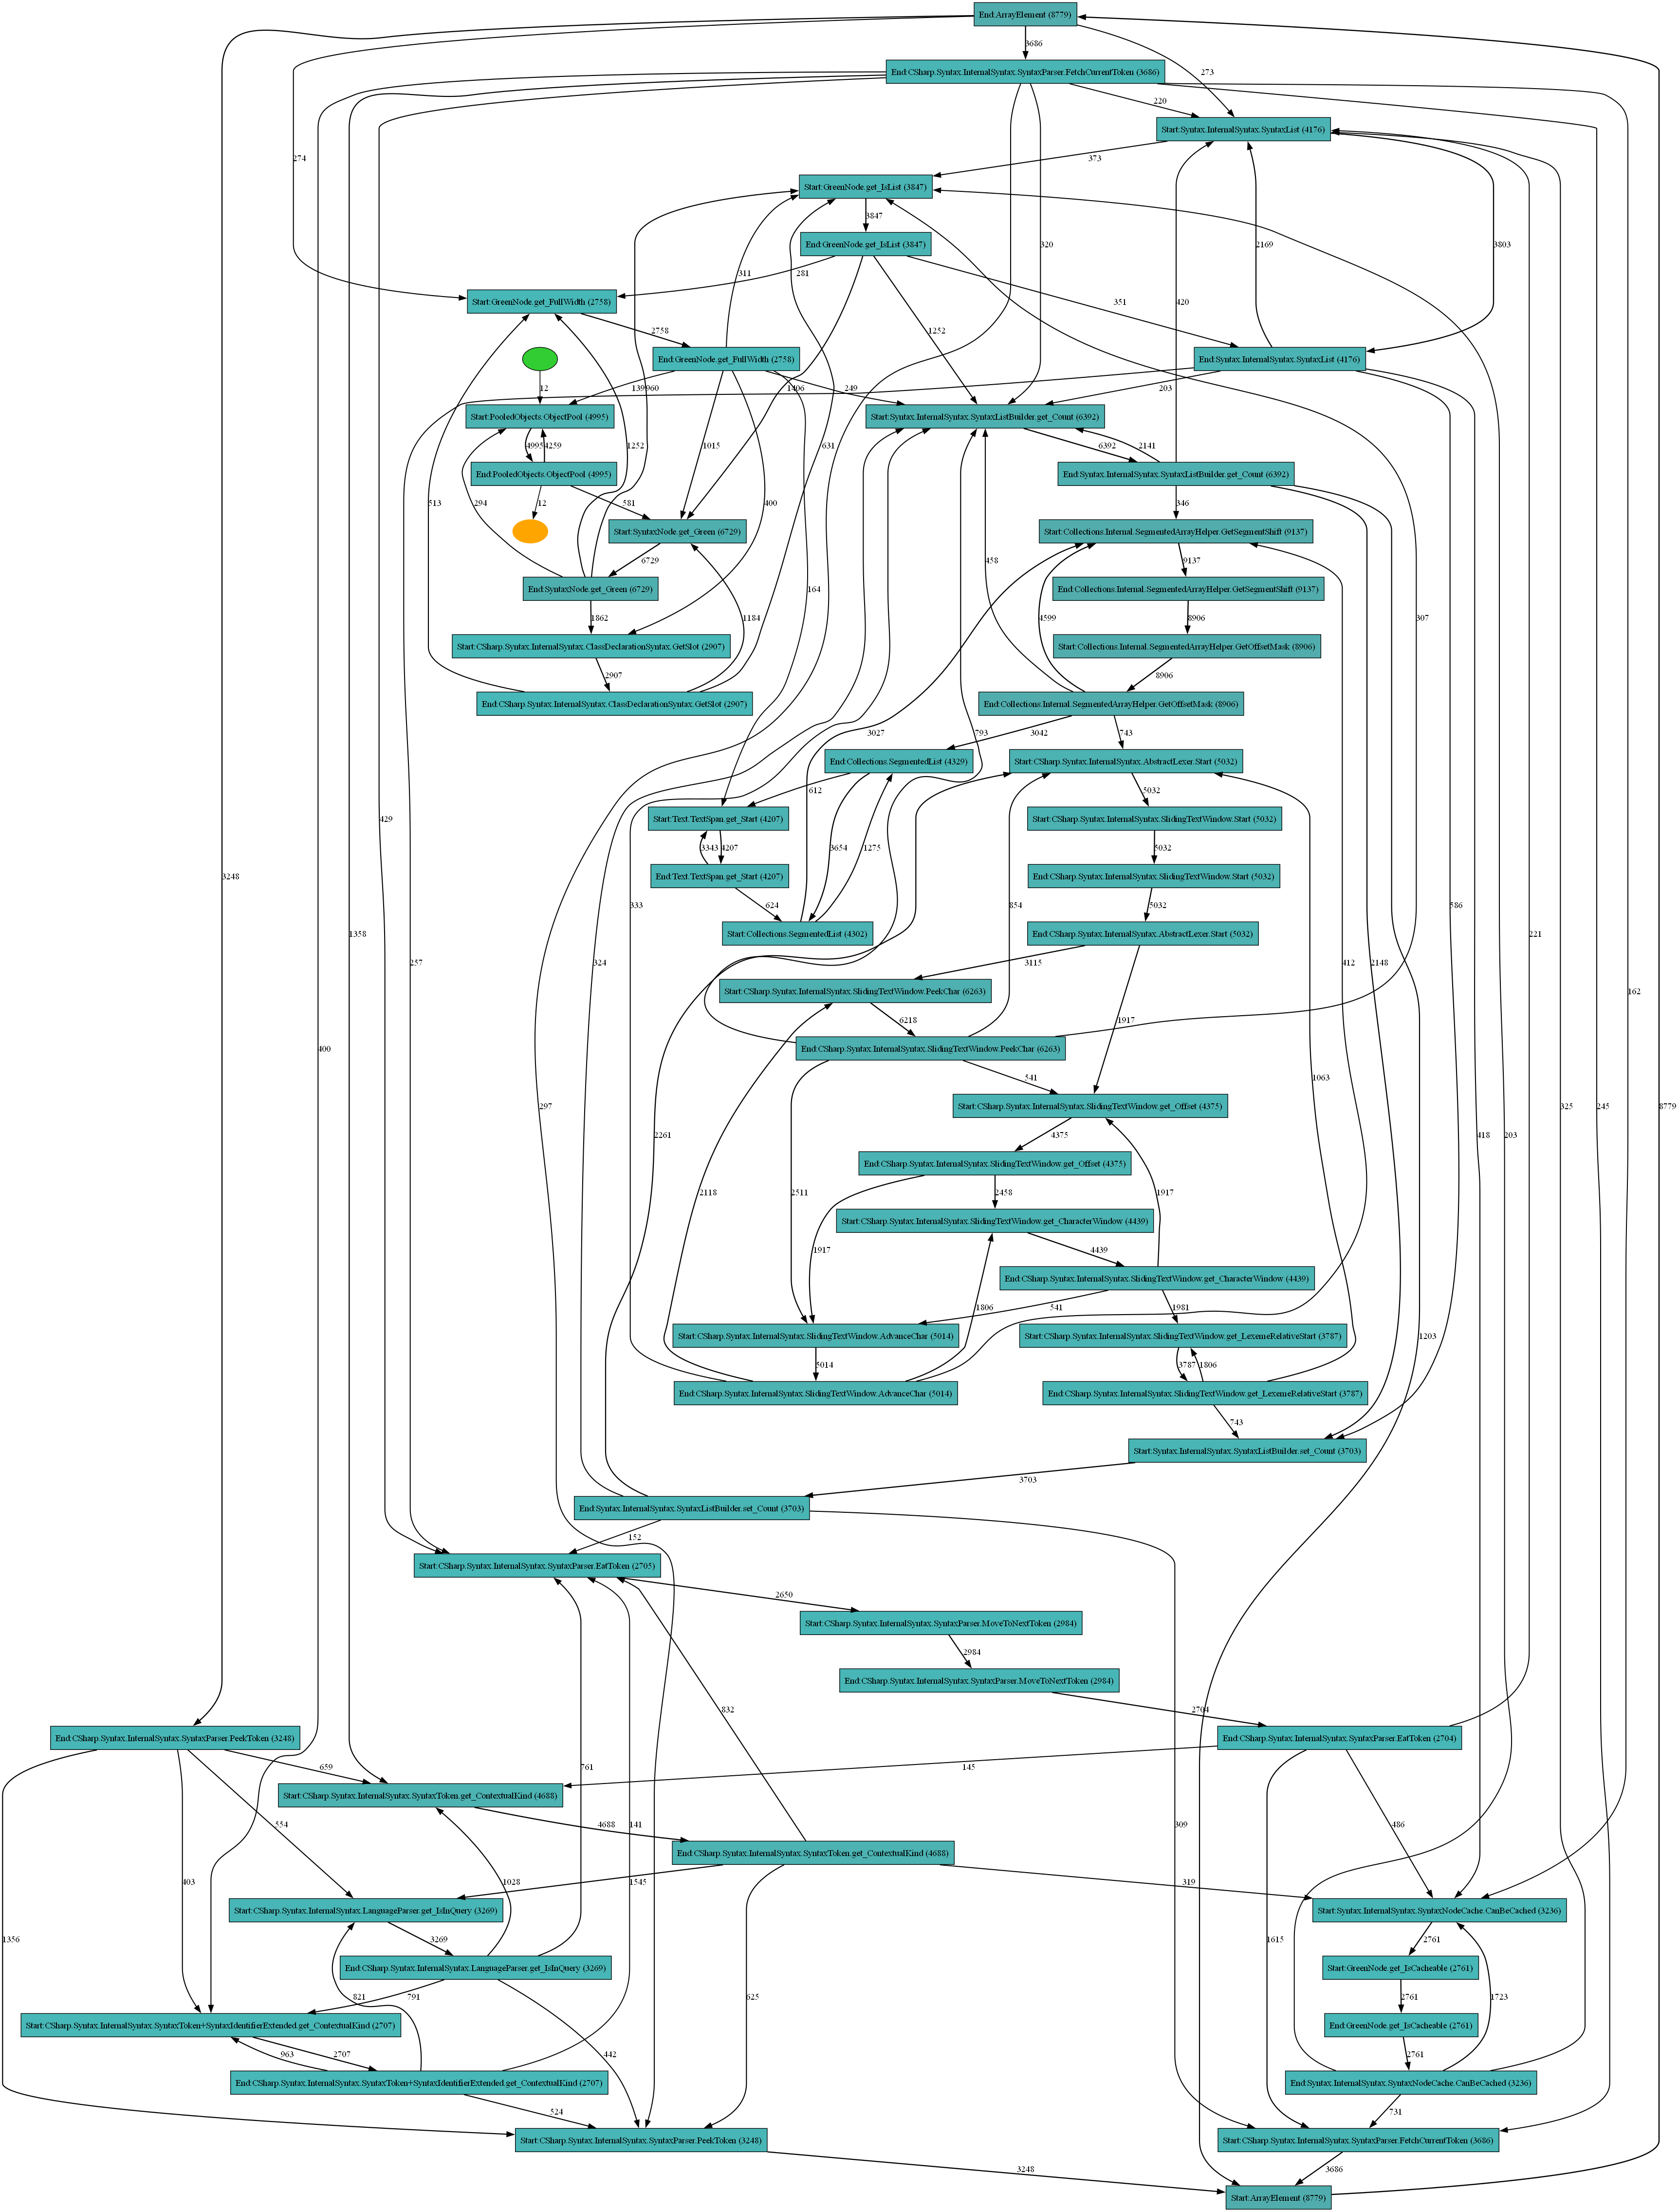

In [6]:
pm4py.view_heuristics_net(heuristics_net)

In [9]:
petri_net = pm4py.convert_to_petri_net(heuristics_net)
pm4py.view_petri_net(*petri_net)

In [20]:
pm4py.simplicity_petri_net(*petri_net)

0.6227390180878553

In [19]:
pn = pm4py.reduce_petri_net_implicit_places(*petri_net)
pm4py.view_petri_net(*pn)

d:\Programs\Programming\Python\lib\site-packages\pm4py\objects\petri_net\utils\murata.py:138: UserWarning: solution from scipy may be unstable. Please install PuLP (pip install pulp) for fully reliable results.
  warnings.warn(


In [14]:
pm4py.fitness_alignments(log, *petri_net)

aligning log, completed variants ::   0%|          | 0/11 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [178]:
log.isna().sum()

case:concept:name    0
concept:name         0
time:timestamp       0
start_timestamp      0
dtype: int64

In [1]:
import pm4py
log = pm4py.read_xes("filter_1prc.xes")

d:\Programs\Programming\Python\lib\site-packages\pm4py\util\dt_parsing\parser.py:82: UserWarning: ISO8601 strings are not fully supported with strpfromiso for Python versions below 3.11
  warnings.warn(


parsing log, completed traces ::   0%|          | 0/12 [00:00<?, ?it/s]

In [2]:
l = log[(log["case:concept:name"] == '8')]
print(l.shape)
process_tree = pm4py.discover_powl(l)

(16728, 4)


In [4]:
pm4py.view_powl(process_tree)